In [3]:
import pandas as pd

In [59]:
def create_df(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
        cts = []
        sps = []
        pns = []
        vals = []
        for line in lines:
            ct, sp, pn, val = line.split(',')
            cts.append(float(ct))
            sps.append(float(sp))
            pns.append(int(pn))
            vals.append(int(val))
        
    d = {
    'ct': cts,
    'sp': sps,
    'pn': pns,
    'res': vals
    }

    return pd.DataFrame(d)

In [60]:
u500_df = create_df('./u500.txt')
w500_df = create_df('./w500.txt')
w297_df = create_df('./w297.txt')

In [61]:
u500_df.to_excel('./u500.xlsx')
w500_df.to_excel('./w500.xlsx')
w297_df.to_excel('./w297.xlsx')

In [64]:
def draw_plot(df, filename):
    pairs_df = df.drop_duplicates(['sp', 'pn'])[['sp', 'pn']]

    cases = []
    for i, row in pairs_df.iterrows():
        cases.append((row['sp'], row['pn']))

    plt.subplots(constrained_layout=True)
    for idx, case in enumerate(cases):
        sp, pn = case
        selected = df.query(f'sp == {sp} and pn == {pn}')
        selected = selected.groupby(['ct'])['res'].mean()
        x = []
        y = []
        for ct, val in selected.items():
            x.append(ct)
            y.append(val)

        plt.subplot(3, 3, idx + 1)
        plt.plot(x, y)
        plt.title(f'sp = {sp}, pn = {pn}')
        plt.xlabel('ct')
        plt.ylabel('value')

    plt.savefig(filename)
    plt.show()

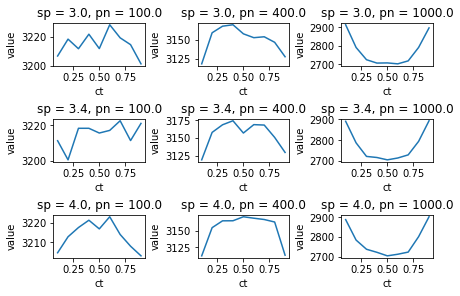

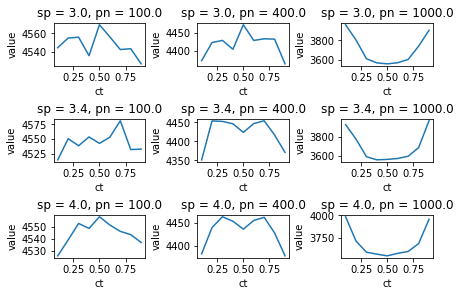

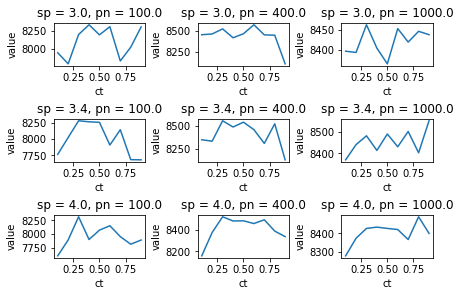

In [65]:
draw_plot(u500_df, 'u500.png')
draw_plot(w500_df, 'w500.png')
draw_plot(w297_df, 'w297.png')

In [66]:
!pip install bayesian-optimization

     |████████████████████████████████| 55.6 MB 8.4 MB/s eta 0:00:012     |████████████████████████████████| 55.5 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 16.9 MB/s eta 0:00:01
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=03af95b8999296f2a00d1d31063fa4734153620e737b7f5a7e56995aea4faf2d
  Stored in directory: /Users/seohyeongyu/Library/Caches/pip/wheels/14/98/74/190efced439ab92ca551550906290338ba5b64cfc9d0927765
Successfully built bayesian-optimization
